# PROJECT:MARKETING CUSTOMER ANALYTICS: EDA

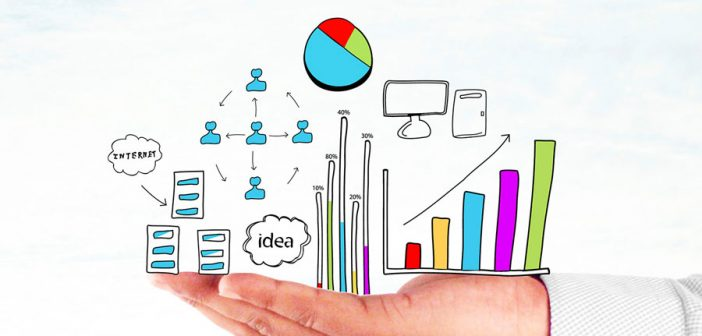

#### INTRODUCTION

In marketing campaigns, customer engagement is a key indicator of your marketing efforts. Profitable marketing campaigns will 
create a ton of engagement. On the other hand, bad marketing will drive customers away from your business. A consumer behavior 
analysis helps you identify how your customers decide on a product or a service. It ranges from simple data analysis and 
visualization to more advanced customer segmentation and predictive analysis. In-depth understanding gained through customer 
analysis helps to formulate marketing strategies, optimize sales channels, and make other key business decisions. The better 
you understand your customers, the stronger your ability to compete against competitors. 

#### PROJECT – DETAILS

PROJECT OUTLINE

This project is regarding analysis on Marketing Customer to understanding their behaviour on the marketing offers and their engagement. We would perform Exploratory Data Analysis  to examine trends and correlations within our data.

GOALS:
1.	Clean the data to make it meaningful for statistical computing.
2.	Examine trends and correlations within the data
3.	Determine which features are most important for a churning customer.

TARGET VARIABLE: 
RESPONSE – We would analyze customer behaviour  and engagement pattern to various marketing offers offered. 

#### DATA WRANGLING

In [70]:
##Reading the data file & import required libraries. 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import chi2_contingency
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
import os
os.getcwd()

'C:\\Users\\sajit\\OneDrive\\Desktop\\Python\\Project'

In [71]:

df=pd.read_csv(r"C:\Users\sajit\OneDrive\Desktop\Python\Project\Marketing-Analysis.csv")


In [72]:
##Checking the data shape and type

df.shape

(9134, 24)

In [73]:
df.shape[0]

9134

In [74]:
df.shape[1]

24

In [75]:
type(df)

pandas.core.frame.DataFrame

In [76]:
## Checking total NULL values


df.apply(lambda x: sum(x.isnull()))

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [77]:
##Checking Duplicate values

dupli=df.duplicated()
print(dupli.sum())

0


In [78]:
##Checking data info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [79]:
df.head(10)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,...,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
6,XZ87318,Oregon,5380.898636,Yes,Basic,College,2/24/11,Employed,F,55350,...,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize
7,CF85061,Arizona,7216.100311,No,Premium,Master,1/18/11,Unemployed,M,0,...,68,0,4,Corporate Auto,Corporate L3,Offer1,Agent,363.029680,Four-Door Car,Medsize
8,DY87989,Oregon,24127.504020,Yes,Basic,Bachelor,1/26/11,Medical Leave,M,14072,...,3,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.200000,Four-Door Car,Medsize
9,BQ94931,Oregon,7388.178085,No,Extended,College,2/17/11,Employed,F,28812,...,7,0,8,Special Auto,Special L2,Offer2,Branch,425.527834,Four-Door Car,Medsize


In [80]:
df.tail(10)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
9124,CB59349,California,16261.585500,No,Extended,Master,1/20/11,Employed,M,60646,...,42,0,2,Personal Auto,Personal L3,Offer2,Agent,643.200000,SUV,Medsize
9125,RX91025,California,19872.262000,No,Premium,High School or Below,1/31/11,Unemployed,M,0,...,35,0,2,Personal Auto,Personal L3,Offer1,Agent,1950.725547,SUV,Small
9126,AC13887,California,4628.995325,No,Basic,Bachelor,1/9/11,Unemployed,M,0,...,21,0,4,Corporate Auto,Corporate L1,Offer1,Branch,482.400000,Two-Door Car,Medsize
9127,TF56202,California,5032.165498,No,Basic,College,2/12/11,Employed,M,66367,...,48,0,3,Personal Auto,Personal L3,Offer2,Call Center,307.200000,Two-Door Car,Small
9128,YM19146,California,4100.398533,No,Premium,College,1/6/11,Employed,F,47761,...,58,0,1,Personal Auto,Personal L2,Offer1,Branch,541.282007,Four-Door Car,Large
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large
9133,Y167826,California,2611.836866,No,Extended,College,2/14/11,Unemployed,M,0,...,90,0,1,Corporate Auto,Corporate L3,Offer4,Call Center,369.600000,Two-Door Car,Medsize


In [81]:
##Rename Column Name

df=df.rename(columns={'Customer':'Customer_ID'})

In [82]:
df.columns

Index(['Customer_ID', 'State', 'Customer Lifetime Value', 'Response',
       'Coverage', 'Education', 'Effective To Date', 'EmploymentStatus',
       'Gender', 'Income', 'Location Code', 'Marital Status',
       'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [83]:
###finding count (number of non_missing values),unique values(or levels), top(mode) and freq(fequency of mode)

df.astype('object').describe().transpose()

,count,unique,top,freq
Customer_ID,9134,9134,VS73599,1
State,9134,5,California,3150
Customer Lifetime Value,9134.0,8041.0,2491.257604,6.0
Response,9134,2,No,7826
Coverage,9134,3,Basic,5568
Education,9134,5,Bachelor,2748
Effective To Date,9134,59,1/10/11,195
EmploymentStatus,9134,5,Employed,5698
Gender,9134,2,F,4658
Income,9134,5694,0,2317


In [84]:
##Finding unique values

df["Sales Channel"].unique()


array(['Agent', 'Call Center', 'Web', 'Branch'], dtype=object)

In [85]:
df["Response"].unique()

array(['No', 'Yes'], dtype=object)

In [86]:
df['State'].unique()

array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'],
      dtype=object)

In [87]:
##Rename TARGET variable values

df["Response"][df["Response"]=='No']='Not Responded'
df["Response"][df["Response"]=='Yes']='Responded'

In [88]:
##Count unique values in TARGET column

df.Response.value_counts()

Not Responded    7826
Responded        1308
Name: Response, dtype: int64

In [89]:
!pip install plotly.express

### Q1.What is the distribution of Marketing engagement?

Univariate Analysis - Categorical

It is an unbalanced data where 85.68% did not respond while only 14.32% responded to an offer.

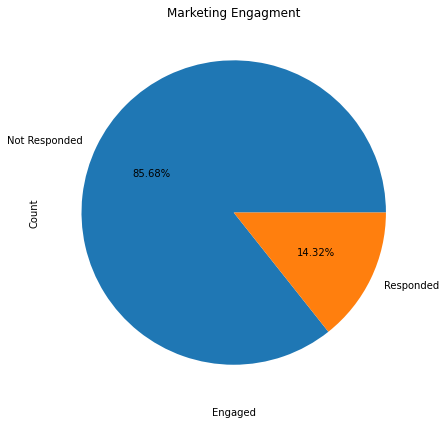

In [90]:
ax = df.groupby('Response').count()['Customer_ID'].plot(
    kind='pie',
    grid=True,
    figsize=(10, 7),
    title='Marketing Engagment',
    autopct='%1.2f%%',
    
)

ax.set_xlabel('Engaged')
ax.set_ylabel('Count')

plt.show()

In [91]:
df.groupby('Response').count()['Customer_ID']/df.shape[0]*100

Response
Not Responded    85.679877
Responded        14.320123
Name: Customer_ID, dtype: float64

### Q2. What is the effect of employment status and education on customer response?

Bivariate Analysis - Categorical vs Categorical

We see that customers with higher levels of education are less likely to respond to an offer
With regards to employment status, customers who are either employed or retired are more likely to respond to an offer

In [92]:
fig1 = px.histogram(df, x="Education", color='Response')
fig1.show()

In [93]:
fig2 = px.histogram(df, x="EmploymentStatus", color='Response')
fig2.show()

### Q3.What is the distribution of customer engagement by Sales Channel?

Bivariate Analysis - Categorical vs Categorical

We see that there are more customers that did not engage with the marketing and the maximum who 
responded were the offer made by agents


In [94]:
contingency_table1 = pd.crosstab(df['Sales Channel'],df['Response'],margins = True)
contingency_table1

Response,Not Responded,Responded,All
Sales Channel,,,
Agent,2811,666,3477
Branch,2273,294,2567
Call Center,1573,192,1765
Web,1169,156,1325
All,7826,1308,9134


In [95]:
contingency_table2 = pd.crosstab(df['Sales Channel'],df['Response'])
contingency_table2

Response,Not Responded,Responded
Sales Channel,,
Agent,2811,666
Branch,2273,294
Call Center,1573,192
Web,1169,156


In [123]:
stat,pval,dof,expected=chi2_contingency(contingency_table2)
pval

3.839111722102483e-23

In [124]:
alpha = 0.05
print("p value is " + str(pval))
if pval <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 3.839111722102483e-23
Dependent (reject H0)


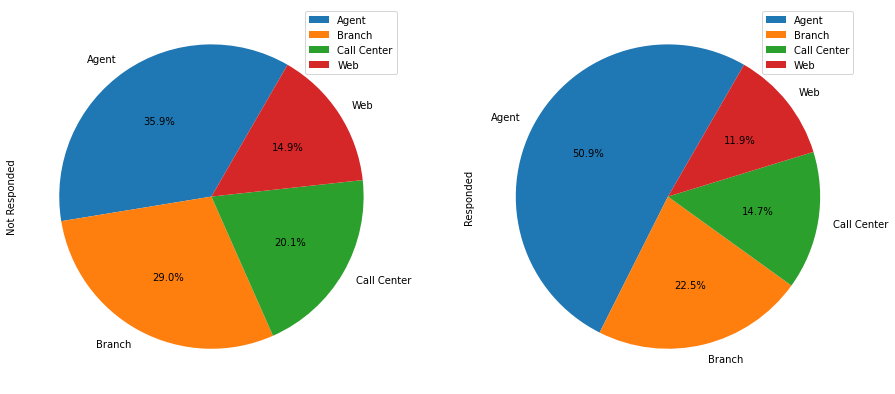

In [96]:
contingency_table2.plot(kind='pie',figsize=(15, 7),startangle=60,
    subplots=True,autopct='%1.1f%%')
plt.show()

### Q4. Is there any relationship between Policy Type and  Response?

Bivariate Analysis - Categorical vs Categorical

NULL Hypothesis (H0)--> There is no relation between the variables

Here, p value 0.4209189781652979 > 0.05 significance level. This means the variables are independent.
Hence, we fail to reject the null hypothesis

In [97]:
contingency_table3 = pd.crosstab(df['Policy Type'],df['Response'])
contingency_table3

Response,Not Responded,Responded
Policy Type,,
Corporate Auto,1680,288
Personal Auto,5830,958
Special Auto,316,62


In [98]:
stat,p,dof,expected=chi2_contingency(contingency_table3)


In [99]:
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.4209189781652979
Independent (H0 holds true)


### Q5. Is there any relationship between Gender and  Response?

Bivariate Analysis - Categorical vs Categorical

NULL Hypothesis (H0)--> There is no relation between the variables

Here, p value 0.6963314758009403 > 0.05 significance level. This means the variables are independent.
Hence, we fail to reject the null hypothesis

In [100]:
contingency_table4 = pd.crosstab(df['Gender'],df['Response'])
contingency_table4

Response,Not Responded,Responded
Gender,,
F,3998,660
M,3828,648


In [101]:
stat,pv,dof,expected=chi2_contingency(contingency_table4)
pv

0.6963314758009403

In [102]:
alpha = 0.05
print("p value is " + str(pv))
if pv <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.6963314758009403
Independent (H0 holds true)


### Q6. What is the response rate based on type of renewal offer and vehical class?

Multivariate Analysis - All Categorical

We see that customers has responded more to Offer 1 & 2.
Customers with medium range cars are more likely to respond to offers than customers with luxury cars. 

In [103]:
offer_Vehicle = df.loc[
    df['Response'] == 'Responded'
].groupby([
    'Renew Offer Type', 'Vehicle Class'
]).count()['Customer_ID']/df.groupby('Renew Offer Type').count()['Customer_ID']*100

offer_Vehicle

Renew Offer Type  Vehicle Class
Offer1            Four-Door Car     7.036247
                  Luxury Car        0.159915
                  Luxury SUV        0.479744
                  SUV               4.477612
                  Sports Car        1.119403
                  Two-Door Car      2.558635
Offer2            Four-Door Car    11.483254
                  Luxury Car        0.205058
                  Luxury SUV        0.410116
                  SUV               4.101162
                  Sports Car        1.640465
                  Two-Door Car      5.536569
Offer3            Four-Door Car     1.675978
                  Two-Door Car      0.418994
Name: Customer_ID, dtype: float64

In [104]:
offer_type = offer_Vehicle.unstack().fillna(0)
offer_type

Vehicle Class,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car
Renew Offer Type,,,,,,
Offer1,7.036247,0.159915,0.479744,4.477612,1.119403,2.558635
Offer2,11.483254,0.205058,0.410116,4.101162,1.640465,5.536569
Offer3,1.675978,0.000000,0.000000,0.000000,0.000000,0.418994


In [105]:
contingency_table5 = pd.crosstab(df['Renew Offer Type'],df['Response'])
contingency_table5

Response,Not Responded,Responded
Renew Offer Type,,
Offer1,3158,594
Offer2,2242,684
Offer3,1402,30
Offer4,1024,0


In [106]:
stat,pv1,dof,expected=chi2_contingency(contingency_table5)
pv1

1.73695030654266e-118

In [107]:
alpha = 0.05
print("p value is " + str(pv1))
if pv1 <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 1.73695030654266e-118
Dependent (reject H0)


In [108]:
contingency_table6 = pd.crosstab(df['Vehicle Class'],df['Response'])
contingency_table6

Response,Not Responded,Responded
Vehicle Class,,
Four-Door Car,3997,624
Luxury Car,151,12
Luxury SUV,154,30
SUV,1508,288
Sports Car,394,90
Two-Door Car,1622,264


In [109]:
stat,pv2,dof,expected=chi2_contingency(contingency_table6)
pv2

0.0007392131130991753

In [110]:
alpha = 0.05
print("p value is " + str(pv2))
if pv2 <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.0007392131130991753
Dependent (reject H0)


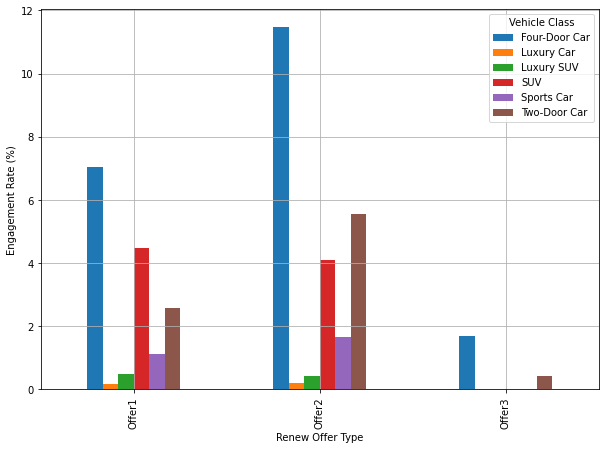

In [111]:
ab = (offer_type).plot(
    kind='bar',
    figsize=(10, 7),
    grid=True
)

ab.set_ylabel('Engagement Rate (%)')

plt.show()

### Q7.Are there any Outliers for Total Claim Amount by cutomer response?

Bivariate analysis - Categorical vs Numerical

Box plots are a good method to plot outliers. We surmise that there are outliers which are shown as dots.

In [112]:
##creating new column by changing categorical to numerical for analysis

df['Engaged'] = df['Response'].apply(lambda x: 0 if x == 'Not Responded' else 1)

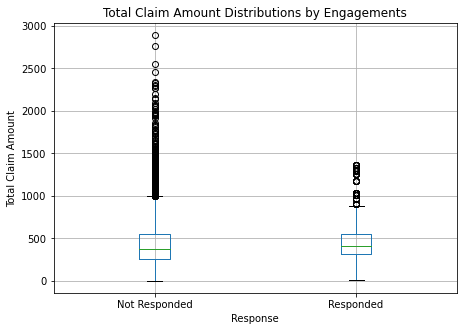

In [113]:
ax = df[['Response', 'Total Claim Amount']].boxplot(
    by='Response',showfliers=True,figsize=(7,5))
ax.set_xlabel('Response')
ax.set_ylabel('Total Claim Amount')
ax.set_title('Total Claim Amount Distributions by Engagements')
plt.suptitle("")
plt.show()

### Q8. Conduct a regression analysis on the numeric variables.

Multivariate analysis - All numerical

We see that the p-values of variables less than 0.05 have significant relation to our target variable 'Response'
The co-efficients are all negatively correlated with the response except Total Claim Amount.

In [114]:
logit = sm.Logit(
    df['Engaged'], 
    df[['Customer Lifetime Value','Income','Monthly Premium Auto',
        'Months Since Last Claim','Months Since Policy Inception','Number of Open Complaints',
        'Number of Policies','Total Claim Amount']])
logit_fit = logit.fit()
logit_fit.summary()

Optimization terminated successfully.
         Current function value: 0.421189
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Engaged   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9126
Method:                           MLE   Df Model:                            7
Date:                Mon, 05 Apr 2021   Pseudo R-squ.:                -0.02546
Time:                        13:28:13   Log-Likelihood:                -3847.1
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Customer Lifetime Value       -6.741e-06   5.04e-06     -1.337      0.181   -1.66e-05    3.14e-06
Income                        -2.857e-06   1.03e-06     -2.766      0.006   -4.88e-06   -8.33e-07
Monthly Premium Auto             -0.0084      0.001     -6.889      0.000      -0.011      -0.006
Months Since Last Claim          -0.0202      0.003     -7.238      0.000      -0.026      -0.015
Months Since Policy Inception    -0.0060      0.001     -6.148      0.000      -0.008      -0.004
Number of Open Complaints        -0.0829      0.034     -2.424      0.015      -0.150      -0.016
Number of Policies               -0.0810      0.013     -6.356      0.000      -0.106      -0.056
Total Claim Amount                0.0001      0.000      0.711      0.477      -0.000       0.000
=================================================================================================
"""

### Q9. Provide a customer segmentation and policy age analysis based on customer enagement. 

Here, we have segmented Customer Lifetime Value  into high and low where median is the separation point &
Months since Policy Inception (Policy Age Segment) into high and low where median is the separation point.

We see that high Policy Age Segment has higher engagement than the Low Policy Age Segment. 
This suggests that those customers who have been insured by this company longer respond better. 
It is also noticeable that the High Policy Age and Low CLV segment has the highest engagement rate among the four segments.

In [115]:
df['Customer Lifetime Value'].describe()

count     9134.000000
mean      8004.940475
std       6870.967608
min       1898.007675
25%       3994.251794
50%       5780.182197
75%       8962.167041
max      83325.381190
Name: Customer Lifetime Value, dtype: float64

In [116]:
df['CLV Segment'] = df['Customer Lifetime Value'].apply(lambda x: 'High' if x > df['Customer Lifetime Value'].median() else 'Low')

In [117]:
df['Months Since Policy Inception'].describe()

count    9134.000000
mean       48.064594
std        27.905991
min         0.000000
25%        24.000000
50%        48.000000
75%        71.000000
max        99.000000
Name: Months Since Policy Inception, dtype: float64

In [118]:
df['Policy Age Segment'] = df['Months Since Policy Inception'].apply(
    lambda x: 'High' if x > df['Months Since Policy Inception'].median() else 'Low')

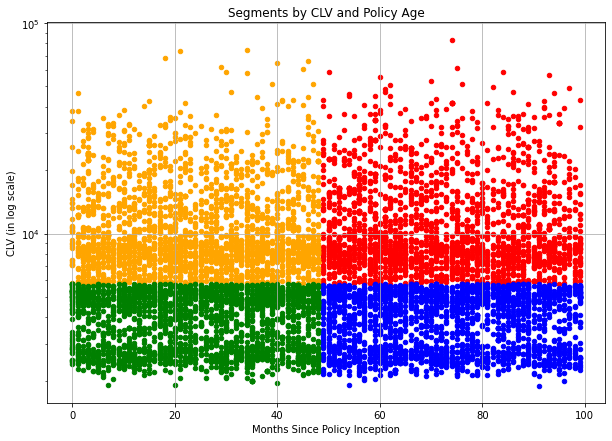

In [119]:
ax = df.loc[
    (df['CLV Segment'] == 'High') & (df['Policy Age Segment'] == 'High')
].plot.scatter(
    x='Months Since Policy Inception',
    y='Customer Lifetime Value',
    logy=True,
    color='red'
)

df.loc[
    (df['CLV Segment'] == 'Low') & (df['Policy Age Segment'] == 'High')
].plot.scatter(
    ax=ax,
    x='Months Since Policy Inception',
    y='Customer Lifetime Value',
    logy=True,
    color='blue'
)

df.loc[
    (df['CLV Segment'] == 'High') & (df['Policy Age Segment'] == 'Low')
].plot.scatter(
    ax=ax,
    x='Months Since Policy Inception',
    y='Customer Lifetime Value',
    logy=True,
    color='orange'
)

df.loc[
    (df['CLV Segment'] == 'Low') & (df['Policy Age Segment'] == 'Low')
].plot.scatter(
    ax=ax,
    x='Months Since Policy Inception',
    y='Customer Lifetime Value',
    logy=True,
    color='green',
    grid=True,
    figsize=(10, 7)
)

ax.set_ylabel('CLV (in log scale)')
ax.set_xlabel('Months Since Policy Inception')

ax.set_title('Segments by CLV and Policy Age')

plt.show()

In [120]:
engagment_rates_by_segment_df = df.loc[
    df['Response'] == 'Responded'
].groupby(
    ['CLV Segment', 'Policy Age Segment']
).count()['Customer_ID']/df.groupby(
    ['CLV Segment', 'Policy Age Segment']
).count()['Customer_ID']*100

engagment_rates_by_segment_df

CLV Segment  Policy Age Segment
High         High                  13.872832
             Low                   13.206733
Low          High                  16.245007
             Low                   13.995680
Name: Customer_ID, dtype: float64

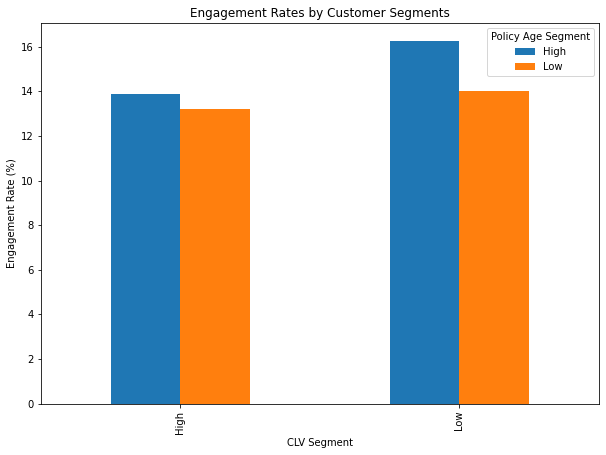

In [121]:
ax = (engagment_rates_by_segment_df.unstack()).plot(
    kind='bar',
    figsize=(10, 7),
    grid=False
)

ax.set_ylabel('Engagement Rate (%)')
ax.set_title('Engagement Rates by Customer Segments')

plt.show()

### Q10. Analyse the relation between all the variables

Multivariate Analysis -  All Numerical

We see that the variables - Income, Monthly premium Auto, Months since Policy Inception and Total claim amount 
have positive correlation. This means that these variables have direct effect on customer engagement.

In [122]:
df.corr()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Engaged
Customer Lifetime Value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451,-0.008930
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254,0.011932
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017,0.010966
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563,-0.016597
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335,0.002952
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241,-0.009881
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354,-0.020891
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000,0.016877
Engaged,-0.008930,0.011932,0.010966,-0.016597,0.002952,-0.009881,-0.020891,0.016877,1.000000


### CONCLUSION

We have scrutinized engagement rates in tabular and visual form, sales channels in pie charts for easier interpretation, total claim amounts in box plots to see ranges and potential outliers, and regression analysis to find strong trends. It appears that employed and retired customers are key features. Total claim amount, income, vehicle class and education too must be considered as factors affecting customer engagement. We also realize that customers are highly inclined towards Offer2, however, Offer3 and Offer4 are least of their choices. Engagement Channel through Agent is more effective way to campaign and engage the more customers to respond.

# THANK YOU